## Week 5 : Support Vector Machines
```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. SVM Recap
2. SVM implementation
3. SVM kernel types
4. Application
```

<hr>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Recap

1. What is SVM? Is it used for classification or regression?

Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
    
Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points. The SVR tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line.

2. What are Support Vectors?

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

3. What is a Hyperplane?

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

4. What is a Margin?

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

5. How does SVM work?

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. 

### 1.1 Problem Statement

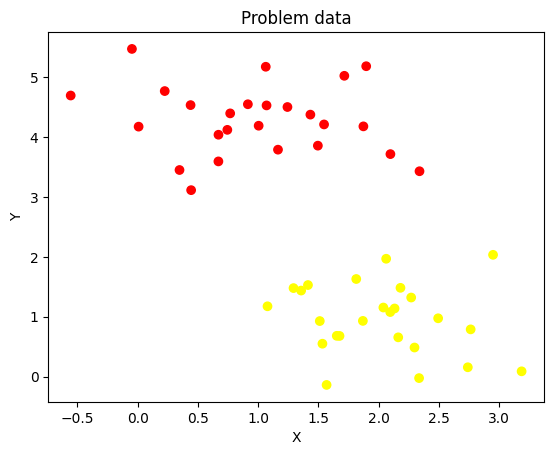

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

# Import data and visualize
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problem data")
plt.show()

How can we create a data separation rule to later use? Draw a line and use that line's equation as the separation rule... **simple intuition**

### 1.2 Solution (1)
Draw 3 lines separating the data points. Test data point is marked **X**

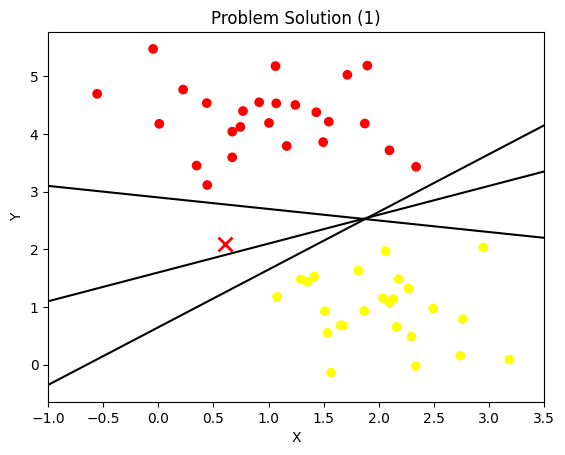

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problem Solution (1)")
plt.xlim(-1, 3.5)
plt.show()

**<span style="color:red">Can we see problem with solution (1) ?**

**<span style="color:blue">Solution to problem** : 
We will draw around each line a **margin** of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

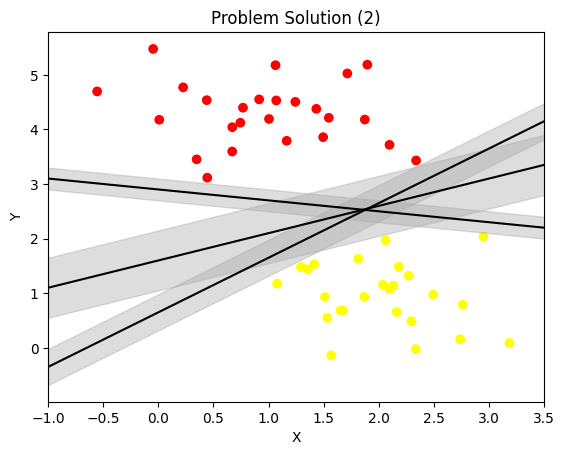

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problem Solution (2)")
plt.xlim(-1, 3.5)
plt.show()

## 2. Support vector classifier

Now we will see our previous solution from sklearn SVM implementation. 

In [5]:
from sklearn.svm import SVC, SVR # "Support vector classifier"
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

**<span style="color:red">How can we see the data separation rule from our model ?**
    
The relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the  `.𝚍𝚎𝚌𝚒𝚜𝚒𝚘𝚗⎯𝚏𝚞𝚗𝚌𝚝𝚒𝚘𝚗()`  method of the `SVC`

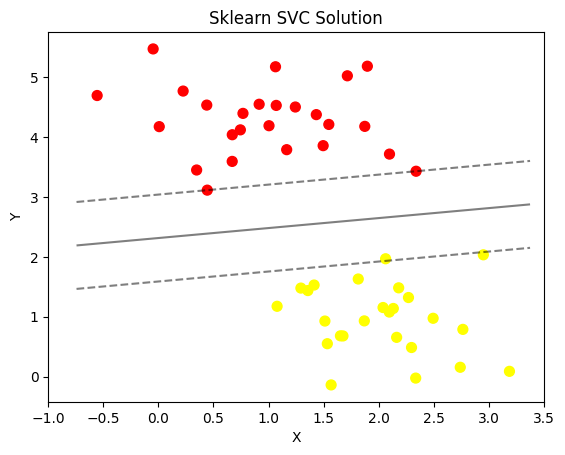

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sklearn SVC Solution")
plt.xlim(-1, 3.5)
plt.show()

**Note :** SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes `support_vectors_`, `support_` and `n_support_`:

In [7]:
print("Support vectors: ", model.support_vectors_) # get support vectors
print("indices of support vectors: ", model.support_) # get indices of support vectors
print("number of support vectors for each class: ", model.n_support_) # get number of support vectors for each class

Support vectors:  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
indices of support vectors:  [18 25  7]
number of support vectors for each class:  [2 1]


The  `𝚌`  argument allows us to specify the cost of a violation to the margin. When the  `𝚌`  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  `𝚌`  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

How do use find the best `𝚌` argument? 
<span style="color:blue"> Using cross validation

## Problem visualization

In [8]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import pandas as pd

In [9]:
def plot_data(df, ax, title):
    grouped = df.groupby('label')
    
    colors = ["red", "blue"]
    labels = ["class A", "class B"]
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=labels[key], color=colors[key])
    ax.set_title(title)

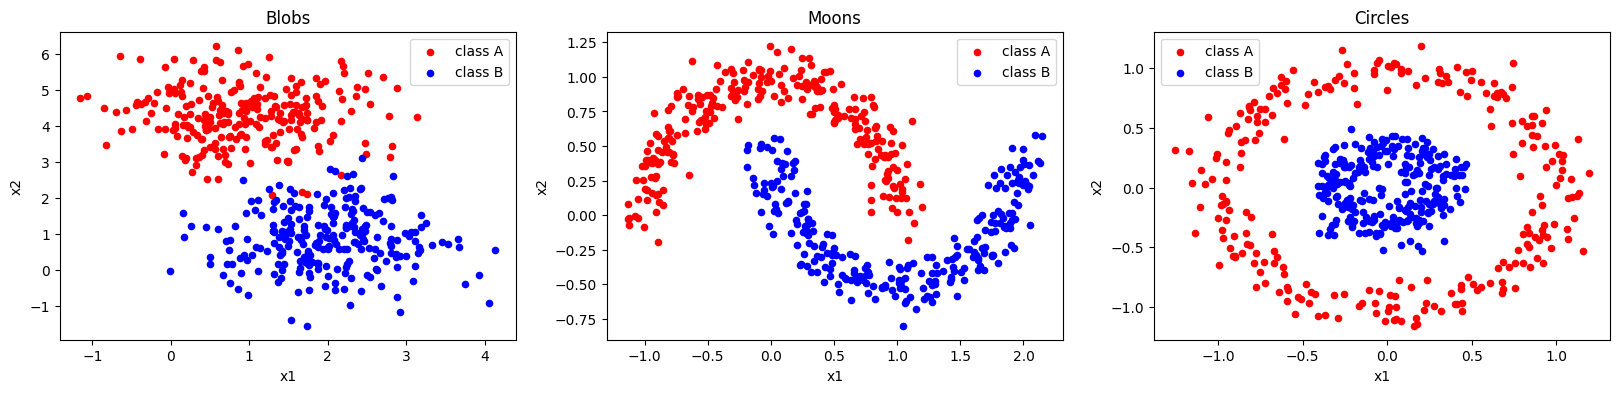

In [10]:
# here we assign values for constants
n_samples = 500
C_const = 100

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
df_blob = pd.DataFrame(dict(x1=X_blob[:,0], x2=X_blob[:,1], label=Y_blob))
plot_data(df_blob, ax1, "Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
df_moon = pd.DataFrame(dict(x1=X_moon[:,0], x2=X_moon[:,1], label=Y_moon))
plot_data(df_moon, ax2, "Moons")

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
df_circle = pd.DataFrame(dict(x1=X_circle[:,0], x2=X_circle[:,1], label=Y_circle))
plot_data(df_circle, ax3, "Circles")

plt.show()

## 3. SVM Kernels 

1. What is called a kernel trick?

### Most popular kernel types

<!--<img src="./image.png">-->

![image.png](image.png)



In [11]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

<span style="color:red">Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.</span>

In [12]:
# test kernels for each dataset
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(20,4))

    linear_model = SVC(kernel='linear')
    linear_model.fit(X, Y)
    plt.subplot(131)
    plt.title("Linear kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(linear_model)

    rbf_model = SVC(kernel='rbf')
    rbf_model.fit(X, Y)
    plt.subplot(132)
    plt.title("RBF kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(rbf_model)

    poly_model = SVC(kernel='poly')
    poly_model.fit(X, Y)
    plt.subplot(133)
    plt.title("Polynomial kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(poly_model)
    plt.show()

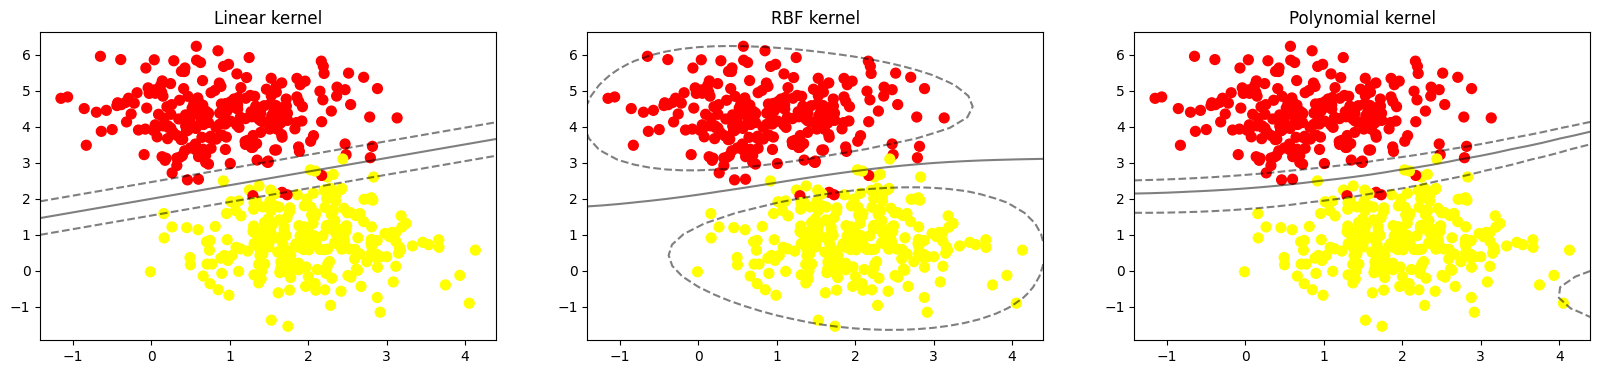

In [13]:
test_kernels(X_blob, Y_blob)

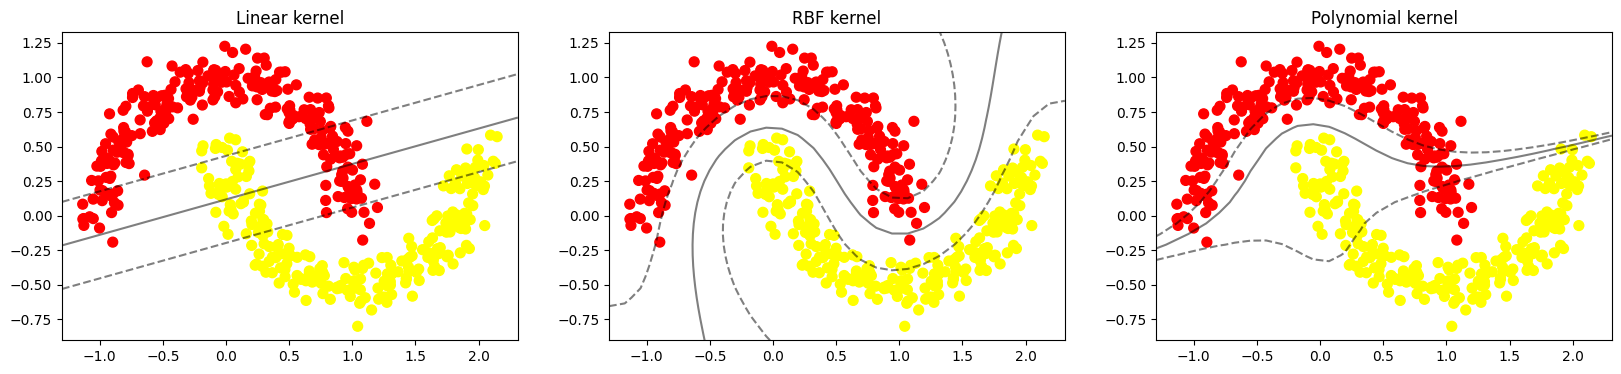

In [14]:
test_kernels(X_moon, Y_moon)

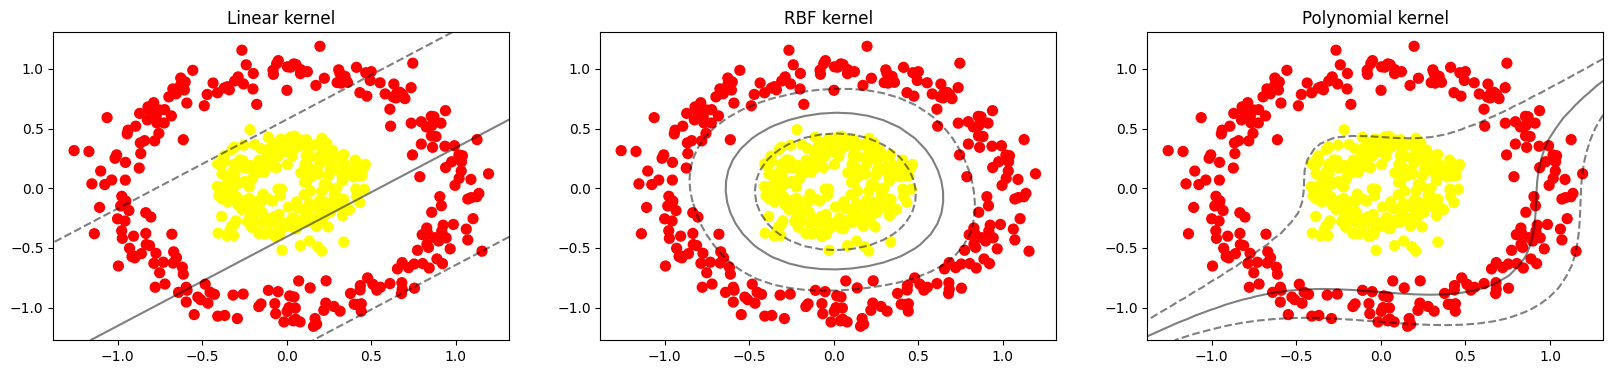

In [15]:
test_kernels(X_circle, Y_circle)

### Exploring parameters effect
<span style="color:red">Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.</span>

**gamma** is inversely proportional to the distance to the seperating hyperplnace. Lower gamma means more elements considered in the computing the sepearting hyperplane.  If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.


In [16]:
def test_kernel(kernel, X, Y, C=1, gamma='scale', degree=3):
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X, Y)
    plt.title(kernel + " kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(model)

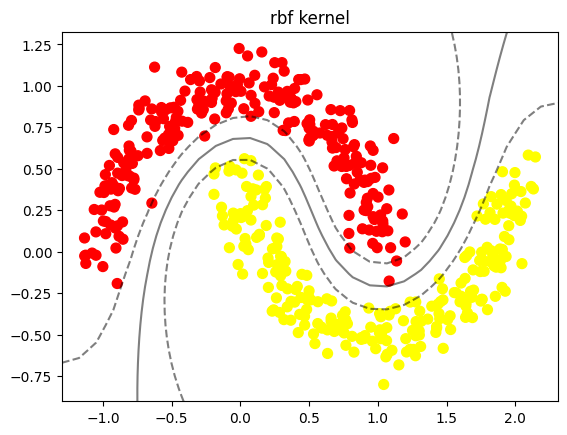

In [17]:
# Manually tune parameters for the moons dataset, plotting the result
test_kernel('rbf', X_moon, Y_moon, C=20, gamma=1)

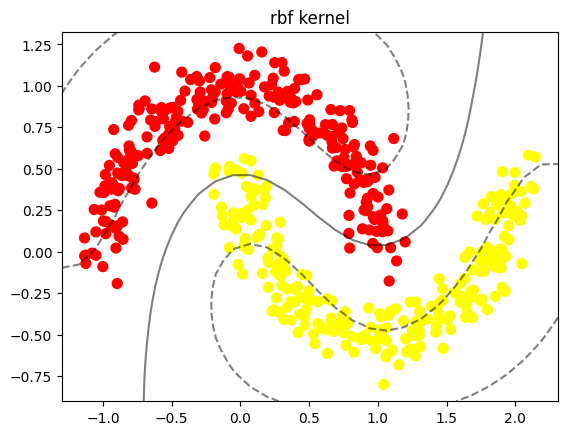

In [18]:
# Manually tune parameters for the moons dataset, plotting the result
test_kernel('rbf', X_moon, Y_moon, C=0.1, gamma=1)

## <center>Self-practice Task</center> 

Using a 10-20% sample from assignment 1

1. Train and evaluate SVR in the task of predicting order preparation minutes
1. Train and evaluate One Class SVC in the task of classification

In [12]:
import pandas as pd
import os

assignment_data_path = os.path.join(os.getcwd(), 'assignment_data')

X_train = pd.read_csv(os.path.join(assignment_data_path, 'regression', 'train_simple.csv'))
X_test = pd.read_csv(os.path.join(assignment_data_path, 'regression', 'test_simple.csv'))

y_train = pd.read_csv(os.path.join(assignment_data_path,'regression', 'y_train_simple.csv')).squeeze()
y_test = pd.read_csv(os.path.join(assignment_data_path, 'regression', 'y_test_simple.csv')).squeeze()


# sample from the data
X_train = X_train.sample(frac=0.1, random_state=0)
X_test = X_test.sample(frac=0.1, random_state=0)

y_train = y_train.reindex(X_train.index)
y_test = y_test.reindex(X_test.index) 

In [14]:
from sklearn.svm import LinearSVR, SVR
from sklearn import metrics

reg_model = SVR(C=0.1, max_iter=5000, kernel='rbf')
reg_model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.root_mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    print(f"Evaluation Metrics for model {type(model).__name__}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

evaluate_model(reg_model, X_test, y_test)

c:\Users\bouab\DEV\Towards_Data_Science\da_env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Evaluation Metrics for model SVR:
Mean Absolute Error (MAE): 8.552987454389028
Root Mean Squared Error (MSE): 15.048892781303621
R-squared (R2): 0.01573140038134757


In [15]:
import pandas as pd

X_train = pd.read_csv(os.path.join(assignment_data_path, 'classification', 'train_simple.csv'))
X_test = pd.read_csv(os.path.join(assignment_data_path, 'classification', 'test_simple.csv'))

y_train = pd.read_csv(os.path.join(assignment_data_path,'classification', 'y_train_simple.csv')).squeeze()
y_test = pd.read_csv(os.path.join(assignment_data_path, 'classification', 'y_test_simple.csv')).squeeze()


# sample from the data
X_train = X_train.sample(frac=0.1, random_state=0)
X_test = X_test.sample(frac=0.1, random_state=0)

y_train = y_train.reindex(X_train.index)
y_test = y_test.reindex(X_test.index) 

In [16]:
from sklearn.svm import LinearSVC

class_model = LinearSVC(C=0.1, penalty='l2', max_iter=5000)
class_model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auc_roc = metrics.roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {auc_roc}")

evaluate_model(class_model, X_test, y_test)

Accuracy: 0.5726069771438391
Precision: 0.5578740157480315
Recall: 0.5095289464221503
F1-score: 0.5326066528847961
ROC-AUC: 0.5699389300906011
